## Descriptive Analysis

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pyrosm
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime

%matplotlib inline

In [53]:
bluebikes = pd.read_csv("bluebikes_2017_2018.csv", index_col="index")
bluebikes

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
index,,,,,,,,,
0,2018-08-28 07:01:05,2018-08-28 07:06:57,137,42.398365,-71.107818,220,42.396384,-71.120105,3296
1,2018-04-11 18:21:53,2018-04-11 18:35:06,122,42.345733,-71.100694,179,42.355601,-71.103945,1766
2,2018-11-28 17:08:21,2018-11-28 17:22:44,22,42.352175,-71.055547,98,42.371848,-71.060292,2585
3,2018-05-29 08:13:13,2018-05-29 08:23:12,88,42.374035,-71.101427,107,42.362500,-71.088220,2768
4,2018-07-13 06:26:24,2018-07-13 06:34:04,47,42.362811,-71.056067,64,42.351004,-71.049300,1002
...,...,...,...,...,...,...,...,...,...
3081595,2018-11-11 16:21:53,2018-11-11 17:01:29,160,42.337586,-71.096271,81,42.352409,-71.062679,3559
3081596,2017-08-02 08:28:53,2017-08-02 08:45:32,99,42.385582,-71.113341,80,42.361962,-71.092053,1113
3081597,2017-08-19 13:41:02,2017-08-19 13:48:03,47,42.362811,-71.056067,59,42.351356,-71.059367,700


In [54]:
bluebikes_stations = pd.read_csv("bluebikes_stations.csv")
bluebikes_stations

,station_id,lat,lon
0,67,42.358100,-71.093198
1,139,42.361780,-71.108100
2,36,42.349792,-71.077338
3,10,42.350406,-71.108279
4,9,42.351187,-71.115852
...,...,...,...
308,229,42.345033,-71.096649
309,374,42.356683,-71.061666
310,376,42.360274,-71.128525
311,377,42.379273,-71.103419


In [55]:
bluebikes_idle_time = pd.read_csv("bluebikes_idle_time_bike")
bluebikes_idle_time

,start_station_id,end_station_id,bike_id,start_idle_time,end_idle_time,idle_time
0,16,39,1,2017-01-06 09:00:30,2017-01-06 09:07:51,0 days 00:07:21
1,39,43,1,2017-01-06 09:22:12,2017-03-06 18:37:43,59 days 09:15:31
2,21,46,1,2017-03-06 18:40:16,2017-03-07 09:17:09,0 days 14:36:53
3,46,67,1,2017-03-07 09:24:10,2017-03-07 12:49:44,0 days 03:25:34
4,67,179,1,2017-03-07 12:54:13,2017-03-07 13:25:43,0 days 00:31:30
...,...,...,...,...,...,...
3073127,363,161,4553,2018-12-20 18:29:50,2018-12-24 08:34:19,3 days 14:04:29
3073128,161,192,4553,2018-12-24 08:42:33,2018-12-26 13:38:34,2 days 04:56:01
3073129,192,59,4553,2018-12-26 13:40:42,2018-12-28 17:24:08,2 days 03:43:26
3073130,59,152,4553,2018-12-28 17:28:08,2018-12-31 09:17:14,2 days 15:49:06


In [56]:
# convert into datetime
bluebikes_idle_time["start_idle_time"] = pd.to_datetime(bluebikes_idle_time["start_idle_time"])
bluebikes_idle_time["end_idle_time"] = pd.to_datetime(bluebikes_idle_time["end_idle_time"])
bluebikes_idle_time["idle_time"] = pd.to_timedelta(bluebikes_idle_time["idle_time"])

In [73]:
# add additional columns
bluebikes_idle_time["idle_time_hours"] = bluebikes_idle_time["idle_time"].dt.total_seconds() / 3600
bluebikes_idle_time["idle_time_seconds"] = bluebikes_idle_time["idle_time"].dt.total_seconds()

### Data Summarization

In [58]:
bluebikes_idle_time.info()
bluebikes_idle_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073132 entries, 0 to 3073131
Data columns (total 7 columns):
 #   Column            Dtype          
---  ------            -----          
 0   start_station_id  int64          
 1   end_station_id    int64          
 2   bike_id           int64          
 3   start_idle_time   datetime64[ns] 
 4   end_idle_time     datetime64[ns] 
 5   idle_time         timedelta64[ns]
 6   idle_time_hours   float64        
dtypes: datetime64[ns](2), float64(1), int64(3), timedelta64[ns](1)
memory usage: 164.1 MB


,start_station_id,end_station_id,bike_id,idle_time,idle_time_hours
count,3.073132e+06,3.073132e+06,3.073132e+06,3073132,3.073132e+06
mean,9.135371e+01,9.121896e+01,1.778261e+03,0 days 09:29:45.164203164,9.495879e+00
std,6.343918e+01,6.364611e+01,1.139471e+03,2 days 08:55:55.366329819,5.693205e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0 days 00:00:03,8.333333e-04
25%,4.400000e+01,4.400000e+01,8.160000e+02,0 days 00:23:50,3.972222e-01
50%,7.500000e+01,7.500000e+01,1.665000e+03,0 days 01:40:26,1.673889e+00
75%,1.310000e+02,1.310000e+02,2.679000e+03,0 days 08:07:09,8.119167e+00
max,3.780000e+02,3.780000e+02,4.553000e+03,538 days 23:40:32,1.293568e+04


In [59]:
bluebikes_idle_time.value_counts()

start_station_id  end_station_id  bike_id  start_idle_time      end_idle_time        idle_time        idle_time_hours
1                 1               158      2017-07-10 13:33:51  2017-07-10 19:12:09  0 days 05:38:18  5.638333           1
105               149             1188     2017-06-10 19:50:46  2017-06-10 20:32:31  0 days 00:41:45  0.695833           1
                                  1106     2018-06-30 20:40:02  2018-06-30 23:56:30  0 days 03:16:28  3.274444           1
                                  1110     2017-10-17 11:08:34  2017-10-17 12:34:40  0 days 01:26:06  1.435000           1
                                  1111     2017-10-28 15:02:05  2017-10-28 16:06:04  0 days 01:03:59  1.066389           1
                                                                                                                        ..
55                53              339      2017-10-01 18:27:13  2017-10-02 07:23:38  0 days 12:56:25  12.940278          1
                     

### Data Visualization

In [60]:
sns.set_theme(style="whitegrid")

array([[<Axes: title={'center': 'start_station_id'}>,
        <Axes: title={'center': 'end_station_id'}>],
       [<Axes: title={'center': 'bike_id'}>,
        <Axes: title={'center': 'start_idle_time'}>],
       [<Axes: title={'center': 'end_idle_time'}>,
        <Axes: title={'center': 'idle_time_hours'}>]], dtype=object)

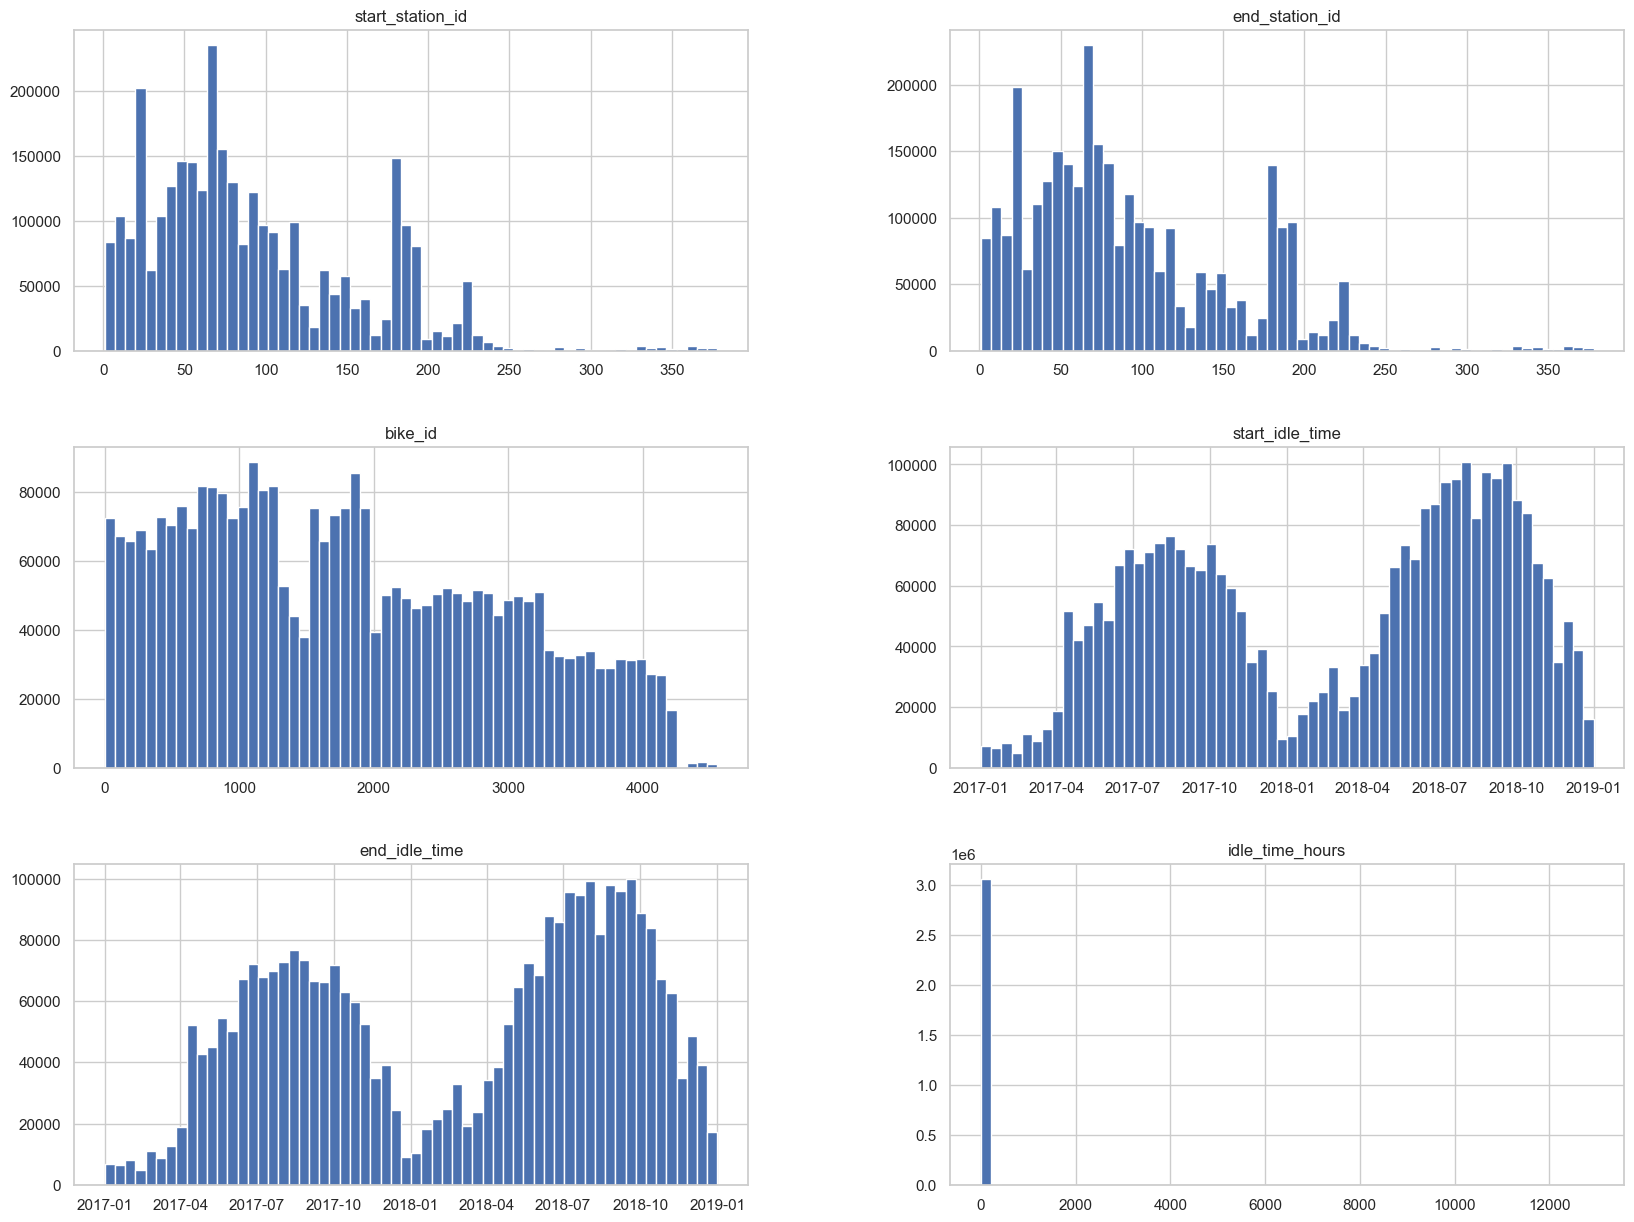

In [61]:
# Overview
bluebikes_idle_time.hist(bins=60, figsize=(20,15))

In [62]:
# taking a closer look at idle_time_hour
bluebikes_idle_time[bluebikes_idle_time["idle_time_hours"] < 1000].count()

start_station_id    3071474
end_station_id      3071474
bike_id             3071474
start_idle_time     3071474
end_idle_time       3071474
idle_time           3071474
idle_time_hours     3071474
dtype: int64

In [63]:
bluebikes_idle_time[bluebikes_idle_time["idle_time_hours"] >= 1000].count()

start_station_id    1658
end_station_id      1658
bike_id             1658
start_idle_time     1658
end_idle_time       1658
idle_time           1658
idle_time_hours     1658
dtype: int64

<Axes: xlabel='bike_id', ylabel='idle_time_hours'>

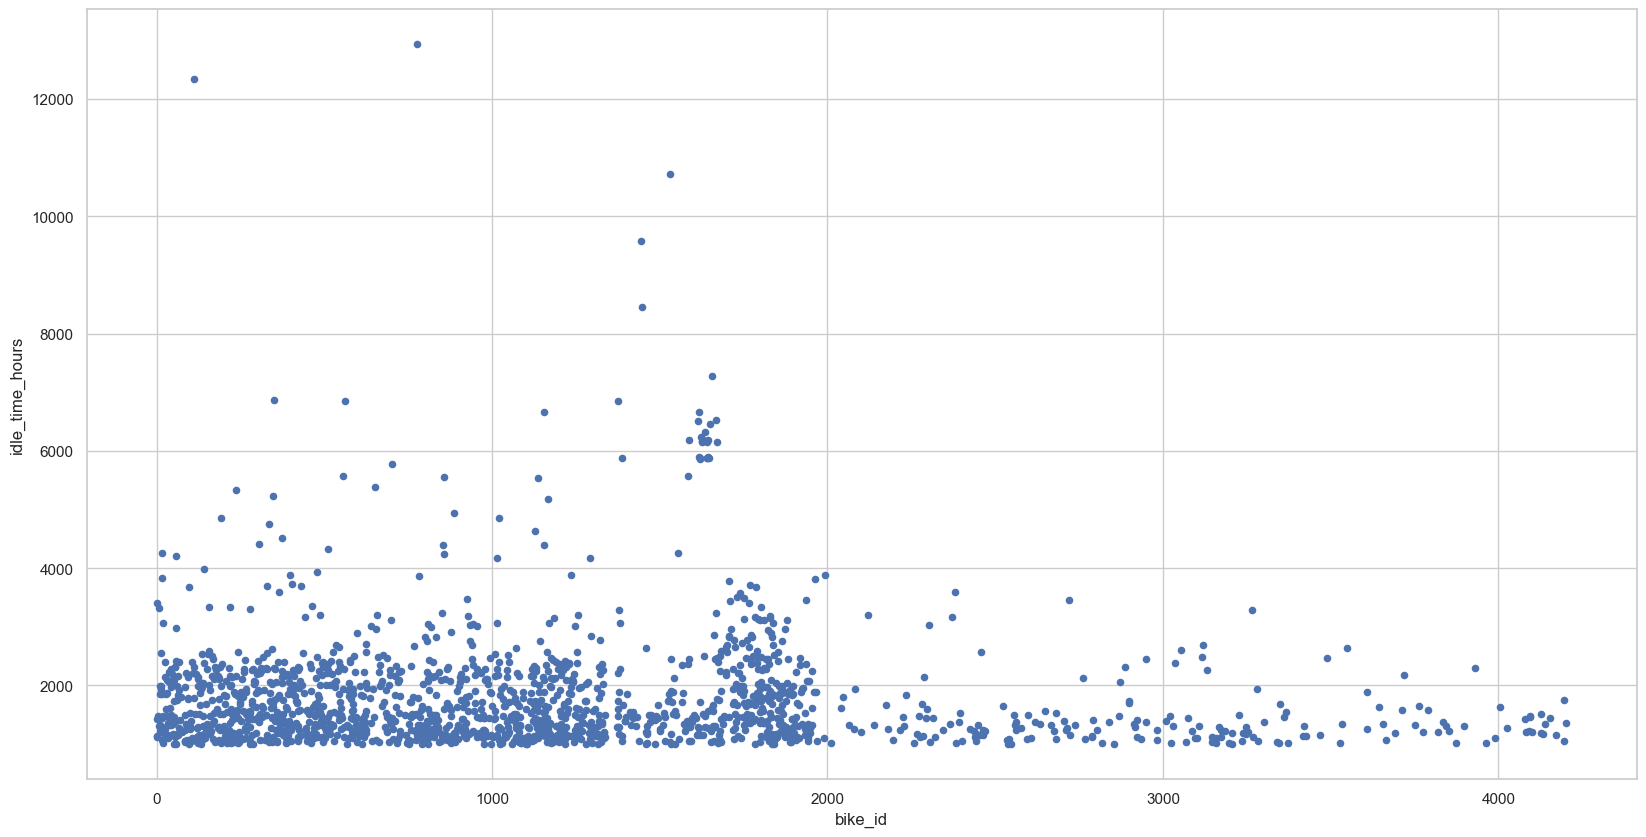

In [64]:
long_idle_time = bluebikes_idle_time[bluebikes_idle_time["idle_time_hours"] >= 1000]
long_idle_time[["bike_id", "idle_time_hours"]].plot(kind="scatter", x ="bike_id", y ="idle_time_hours", figsize=(20,10))

[]

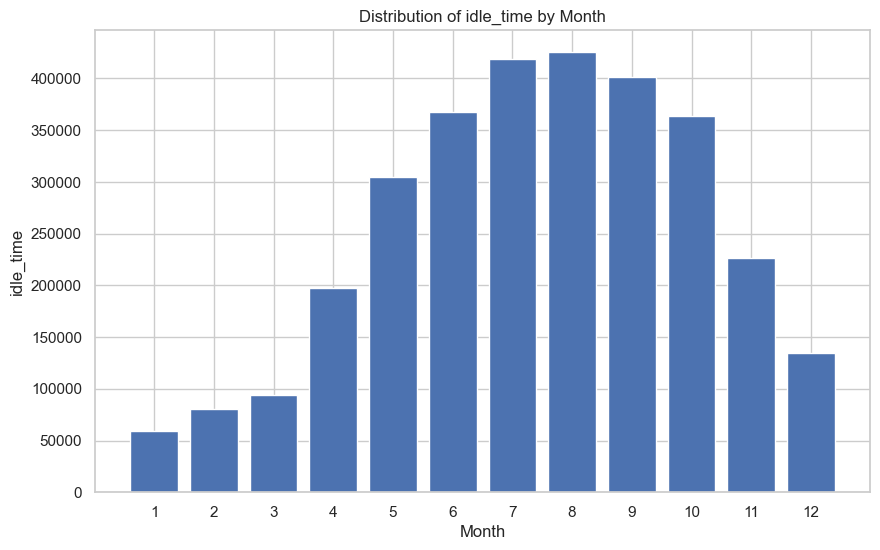

In [68]:
bluebikes_idle_time["start_idle_time_month"] = bluebikes_idle_time["start_idle_time"].apply(lambda dt: dt.month)

# init x and y
bike_idle_time = bluebikes_idle_time["idle_time"]
bike_idle_time_month = bluebikes_idle_time["start_idle_time"].dt.month
bike_idle_time_month = bike_idle_time_month.sort_values(ascending=True)

# Group the data by bike_active_month and calculate the frequency
data = [bike_idle_time[bike_idle_time_month == month] for month in bike_idle_time_month.unique()]
labels = bike_idle_time_month.unique().astype(str)

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(labels, [len(d) for d in data])

plt.xlabel("Month")
plt.ylabel("idle_time")
plt.title("Distribution of idle_time by Month")

plt.plot()

In [74]:
short_idle_time = bluebikes_idle_time[bluebikes_idle_time["idle_time_seconds"] < 3600000]

C:\Users\angel\AppData\Local\Temp\ipykernel_25360\3642300256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_idle_time["start_idle_time_month"] = short_idle_time["start_idle_time"].apply(lambda dt: dt.month)


[]

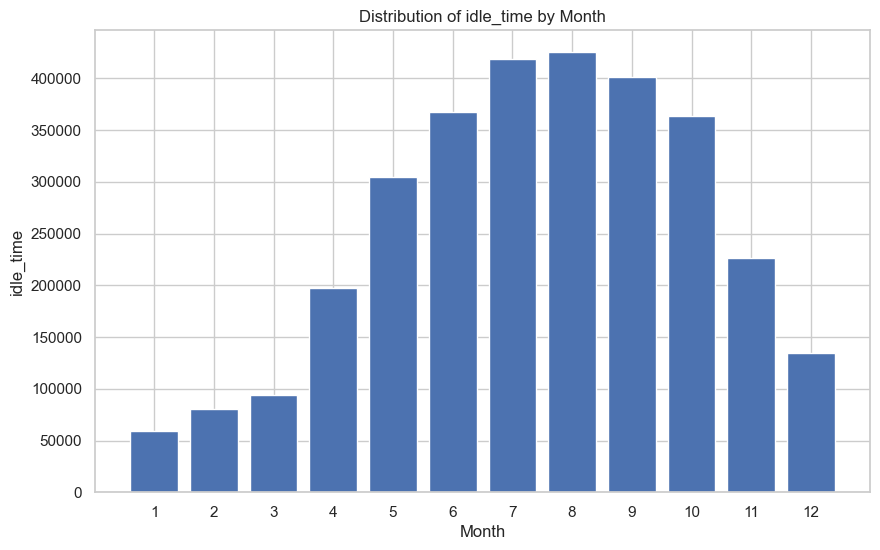

In [75]:
# plot without outliers
short_idle_time["start_idle_time_month"] = short_idle_time["start_idle_time"].apply(lambda dt: dt.month)

bike_idle_time = short_idle_time["idle_time"]
bike_idle_time_month = short_idle_time["start_idle_time"].dt.month
bike_idle_time_month = bike_idle_time_month.sort_values(ascending=True)

# Group the data by bike_active_month and calculate the frequency
data = [bike_idle_time[bike_idle_time_month == month] for month in bike_idle_time_month.unique()]
labels = bike_idle_time_month.unique().astype(str)

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(labels, [len(d) for d in data])

plt.xlabel("Month")
plt.ylabel("idle_time")
plt.title("Distribution of idle_time by Month")

plt.plot()

C:\Users\angel\AppData\Local\Temp\ipykernel_25360\3717557097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_idle_time["start_idle_time_hour"] = short_idle_time["start_idle_time"].apply(lambda dt: dt.hour)


[]

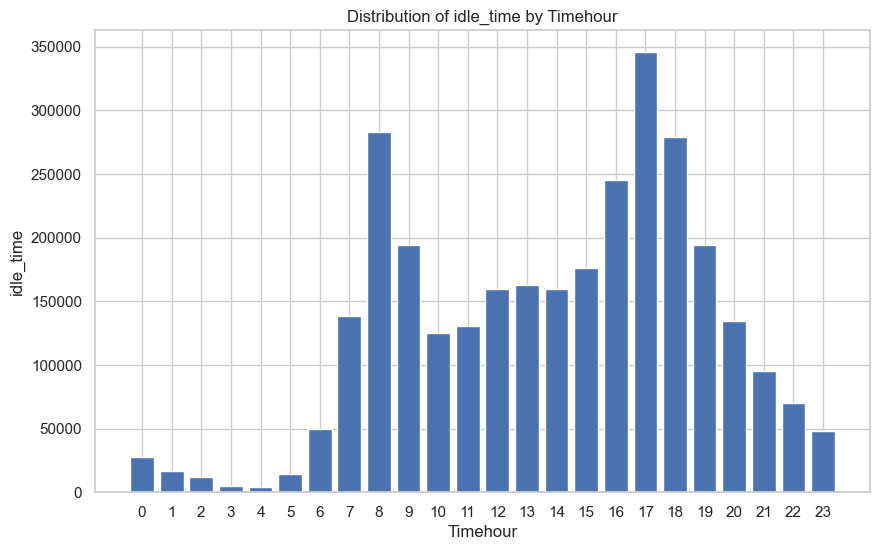

In [89]:
# plot without outliers
short_idle_time["start_idle_time_hour"] = short_idle_time["start_idle_time"].apply(lambda dt: dt.hour)

bike_idle_time = short_idle_time["idle_time"]
bike_idle_time_hour = short_idle_time["start_idle_time"].dt.hour
bike_idle_time_hour = bike_idle_time_hour.sort_values(ascending=True)

# Group the data by bike_active_month and calculate the frequency
data = [bike_idle_time[bike_idle_time_hour == hour] for hour in bike_idle_time_hour.unique()]
labels = bike_idle_time_hour.unique().astype(str)

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(labels, [len(d) for d in data])

plt.xlabel("Timehour")
plt.ylabel("idle_time")
plt.title("Distribution of idle_time by Timehour")

plt.plot()

[]

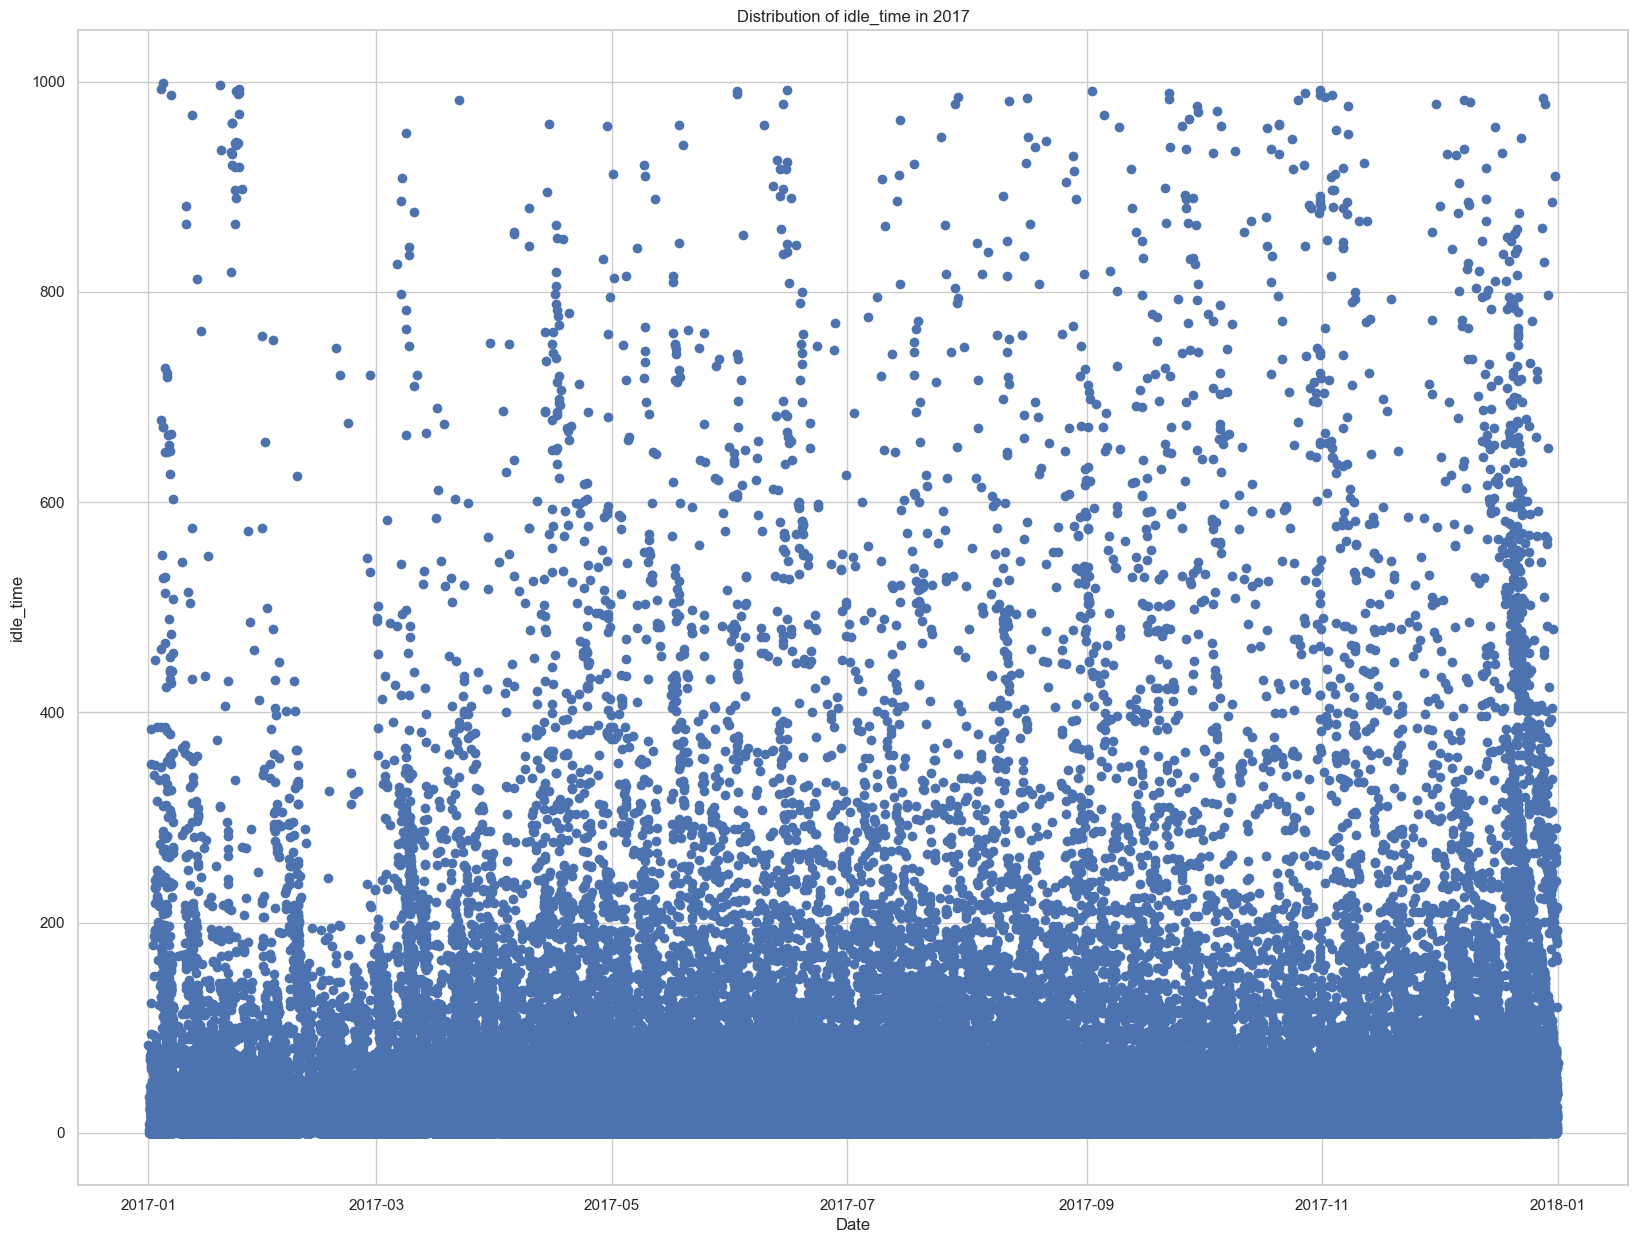

In [88]:
datetime_2018 = datetime.strptime("2018", '%Y')
idle_time_2018 = short_idle_time[short_idle_time["start_idle_time"] < datetime_2018]
bike_idle_time = idle_time_2018[["idle_time_hours"] ]
bike_idle_time_date = idle_time_2018["start_idle_time"]

fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(bike_idle_time_date, bike_idle_time)

plt.xlabel("Date")
plt.ylabel("idle_time")
plt.title("Distribution of idle_time in 2017")

plt.plot()

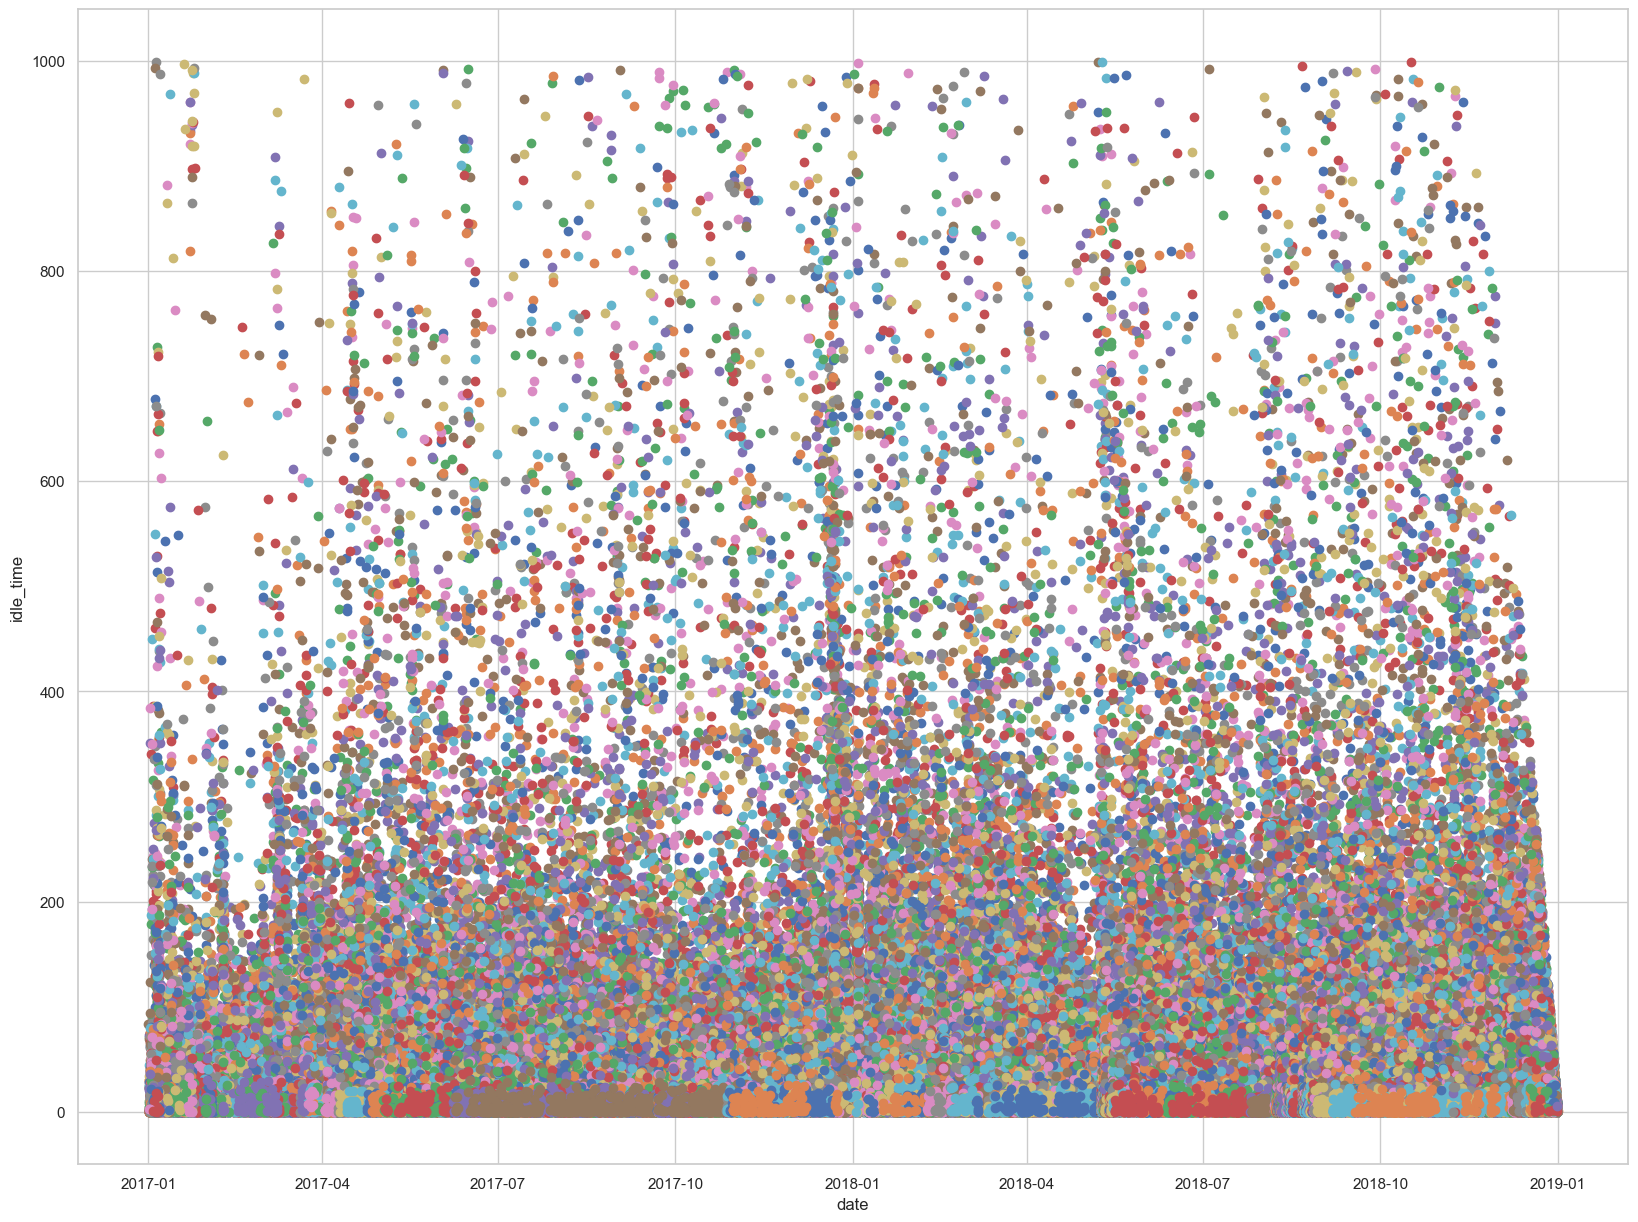

In [102]:
fig, ax = plt.subplots(figsize=(20,15))

for bike in list(short_idle_time["bike_id"].unique()):
    filtered_data = short_idle_time[short_idle_time["bike_id"] == bike]
    x = filtered_data["start_idle_time"]
    y = filtered_data["idle_time_hours"]
    plt.scatter(x, y)

# Set x-axis label and y-axis label
plt.xlabel('date')
plt.ylabel('idle_time')

plt.show()

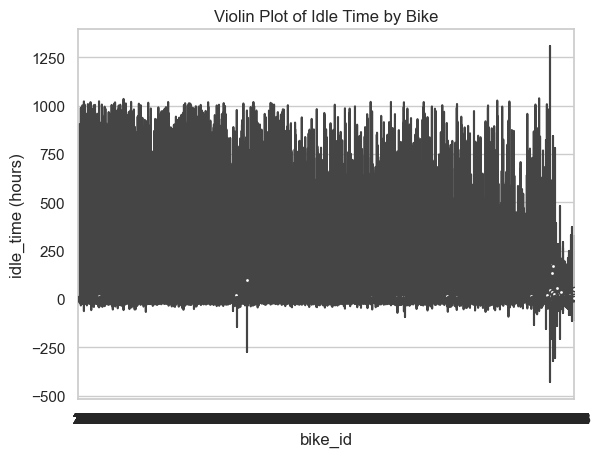

In [103]:
sns.violinplot(x="bike_id", y="idle_time_hours", data=short_idle_time)

plt.xlabel('bike_id')
plt.ylabel('idle_time (hours)')

# Set plot title
plt.title('Violin Plot of Idle Time by Bike')

# Display the plot
plt.show()

In [105]:
fig= plt.figure(figsize=(20, 15))
sns.violinplot(x="bike_id", y="idle_time_hours", data=idle_time_2018)

plt.xlabel('bike_id')
plt.ylabel('idle_time (hours)')

# Set plot title
plt.title('Violin Plot of Idle Time by Bike')

# Display the plot
plt.show()

TypeError: cannot unpack non-iterable Figure object

<Figure size 2000x1500 with 0 Axes>

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

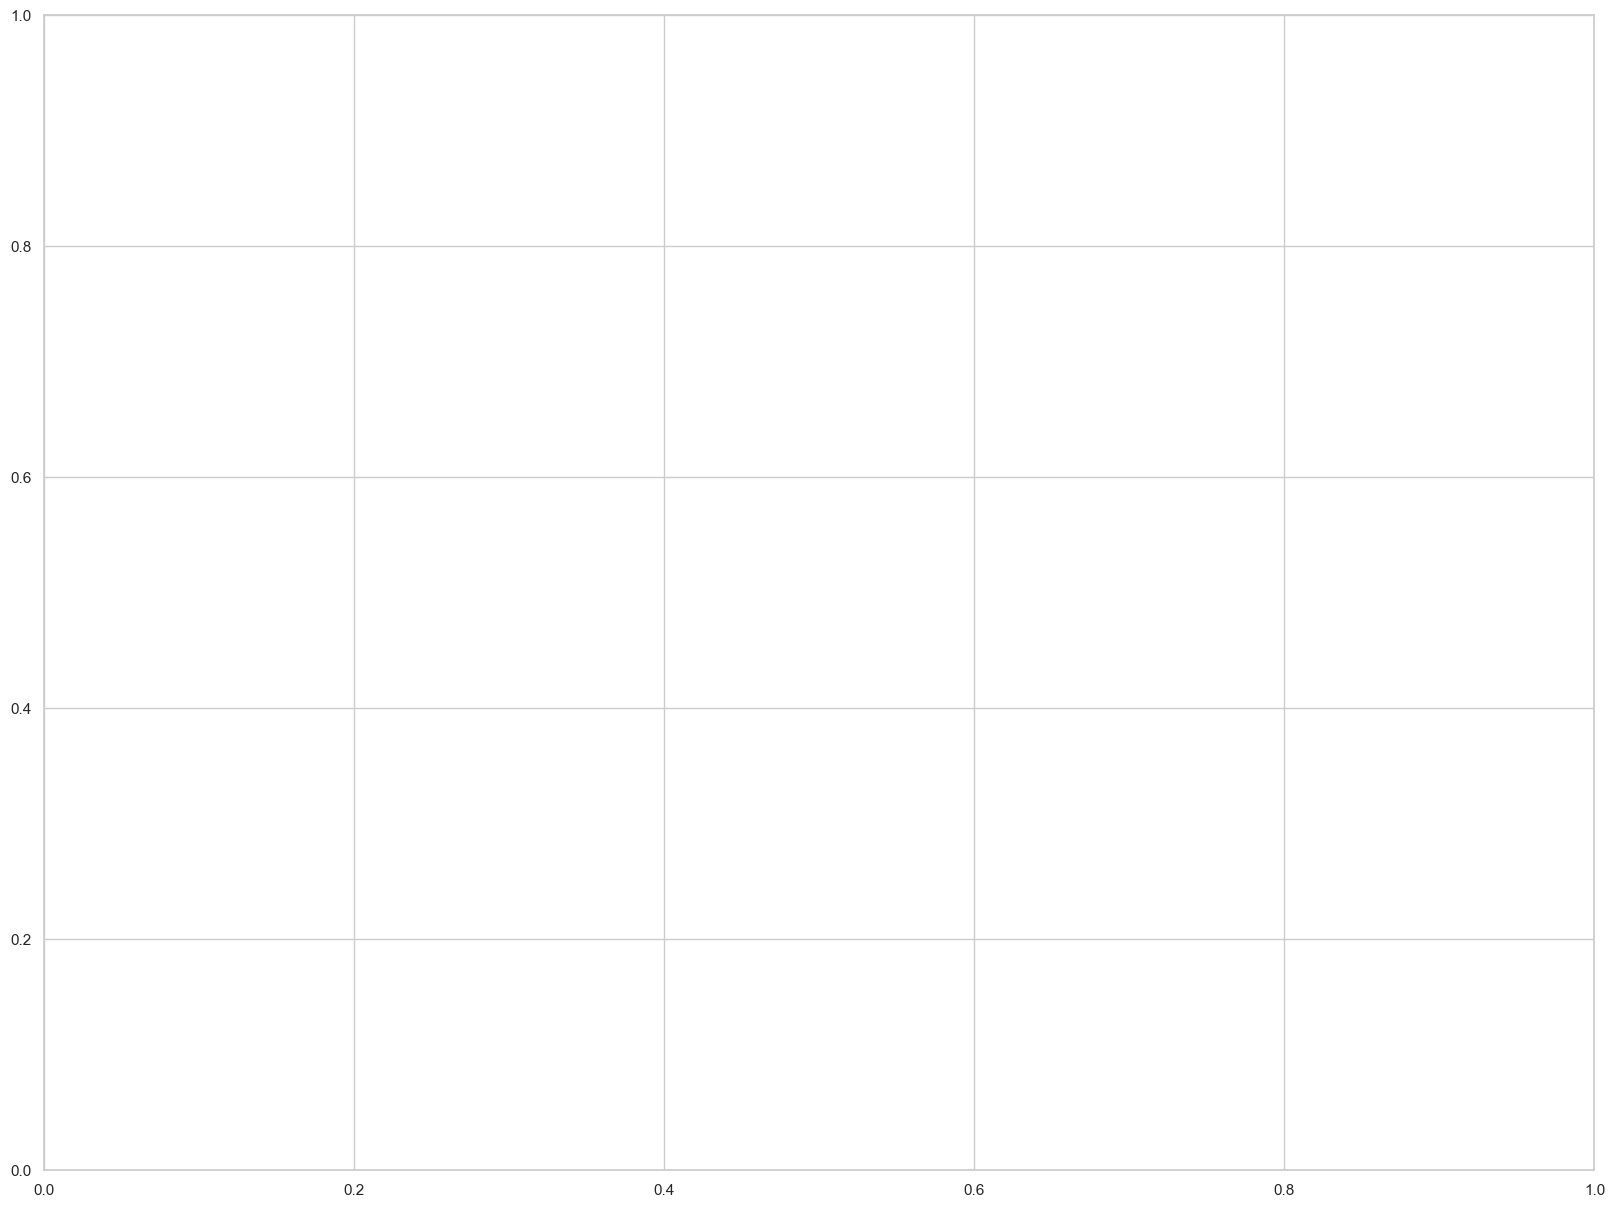

In [104]:
fig, ax = plt.subplots(figsize=(20,15))

for bike in list(short_idle_time["bike_id"].unique()):
    filtered_data = short_idle_time[short_idle_time["bike_id"] == bike]
    x = filtered_data["start_idle_time"]
    plt.boxplot(x)

# Set x-axis label and y-axis label
plt.xlabel('date')
plt.ylabel('idle_time')

plt.show()

### Correlation Coefficient

In [99]:
corr = bluebikes_idle_time.corr()
corr

C:\Users\angel\AppData\Local\Temp\ipykernel_25360\62321002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bluebikes_idle_time.corr()


,start_station_id,end_station_id,bike_id,idle_time_hours,start_idle_time_month,idle_time_seconds
start_station_id,1.000000,0.139030,0.079651,0.018439,0.068149,0.018439
end_station_id,0.139030,1.000000,0.080867,0.050241,0.068057,0.050241
bike_id,0.079651,0.080867,1.000000,-0.031495,0.312116,-0.031495
idle_time_hours,0.018439,0.050241,-0.031495,1.000000,-0.030425,1.000000
start_idle_time_month,0.068149,0.068057,0.312116,-0.030425,1.000000,-0.030425
idle_time_seconds,0.018439,0.050241,-0.031495,1.000000,-0.030425,1.000000


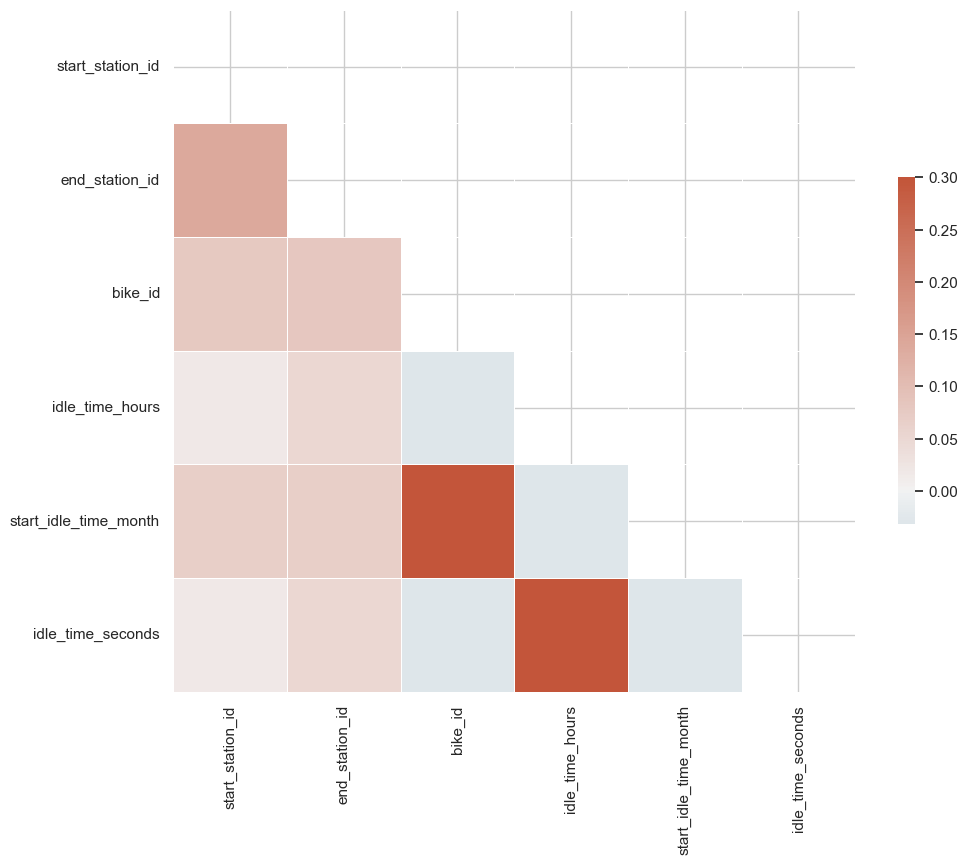

In [101]:
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Summary

In [98]:
bluebikes_idle_time

,start_station_id,end_station_id,bike_id,start_idle_time,end_idle_time,idle_time,idle_time_hours,start_idle_time_month,idle_time_seconds
0,16,39,1,2017-01-06 09:00:30,2017-01-06 09:07:51,0 days 00:07:21,0.122500,1,441.0
1,39,43,1,2017-01-06 09:22:12,2017-03-06 18:37:43,59 days 09:15:31,1425.258611,1,5130931.0
2,21,46,1,2017-03-06 18:40:16,2017-03-07 09:17:09,0 days 14:36:53,14.614722,3,52613.0
3,46,67,1,2017-03-07 09:24:10,2017-03-07 12:49:44,0 days 03:25:34,3.426111,3,12334.0
4,67,179,1,2017-03-07 12:54:13,2017-03-07 13:25:43,0 days 00:31:30,0.525000,3,1890.0
...,...,...,...,...,...,...,...,...,...
3073127,363,161,4553,2018-12-20 18:29:50,2018-12-24 08:34:19,3 days 14:04:29,86.074722,12,309869.0
3073128,161,192,4553,2018-12-24 08:42:33,2018-12-26 13:38:34,2 days 04:56:01,52.933611,12,190561.0
3073129,192,59,4553,2018-12-26 13:40:42,2018-12-28 17:24:08,2 days 03:43:26,51.723889,12,186206.0
3073130,59,152,4553,2018-12-28 17:28:08,2018-12-31 09:17:14,2 days 15:49:06,63.818333,12,229746.0
